In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


18:24:34 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=959888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=450100;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


18:24:35 INFO      Starting 3ML!                                                                     ]8;id=298555;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=371040;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=468316;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=155082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=13491;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=382364;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=240187;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=666751;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

18:24:36 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=432073;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=301481;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=908076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=823453;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=528010;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=655504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

18:24:36 WARNING   No fermitools installed                                              ]8;id=467350;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=117842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 86.85it/s]   

Yourlib init successfully!!!


Load sub from Myspeedup: 100%|██████████| 37/37 [00:19<00:00, 86.85it/s]

In [ ]:
# you can do some change about the lib and reload it any time.
reload(my)

18:34:50 INFO      Creating singleton for                                                            ]8;id=947683;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=598661;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.roo               
                  t                                                                                                

18:34:54 INFO      Region of Interest:                                                                   ]8;id=439733;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=673599;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

         INFO      -------------------                                                                   ]8;id=132030;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=426660;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=615629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=108088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  6.000 deg, model radius: 8.000 deg                                                               

         INFO                                                                                            ]8;id=885265;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=332806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=284241;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=492805;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      --------------------                                                                  ]8;id=421330;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=937248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      Width x height 96 x 96 px                                                             ]8;id=506786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=346668;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=648866;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=355631;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#304\304]8;;\

         INFO                                                                                            ]8;id=334151;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=123386;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#307\307]8;;\

         INFO      Response:                                                                             ]8;id=273552;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=194139;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      ---------                                                                             ]8;id=931672;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=135796;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      Response file:                                                                   ]8;id=362884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=773230;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=94125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=172873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=757437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=30507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=780522;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=234742;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#313\313]8;;\

         INFO      Map Tree:                                                                             ]8;id=650999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=393874;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      ----------                                                                            ]8;id=575783;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=296900;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,2.012777e+07,2.001759e+07,1.005504,34461,112.980072
1,1,1024,RING,9.953890e+06,9.853523e+06,1.010186,34461,112.980072
2,2,1024,RING,1.682197e+06,1.647152e+06,1.021276,34461,112.980072
3,3,1024,RING,7.149690e+05,6.932871e+05,1.031274,34461,112.980072
4,4,1024,RING,1.928676e+05,1.841879e+05,1.047124,34461,112.980072
5,5,1024,RING,4.899379e+04,4.624299e+04,1.059486,34461,112.980072


         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=451282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=836817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 3.31 Mb                                                         ]8;id=199841;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=114747;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=325460;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=197036;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#319\319]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=540565;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=412007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#321\321]8;;\

         INFO      -------------------------------                                                       ]8;id=886407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=391239;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=266771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=533573;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


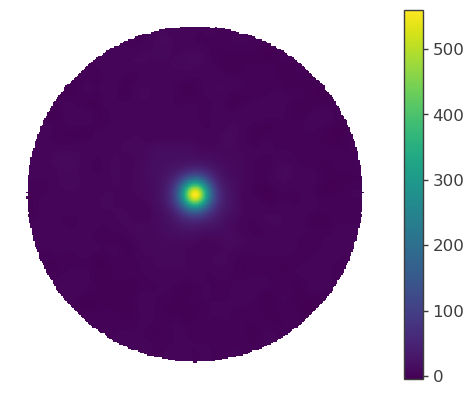

In [2]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"

# maptree = "../../data/20210305_20230731_ihep_goodlist.root"
maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
# response = "../../data/WCDA_DR_psf.root"
# response = "../../data/DR_ihep_MK2_hscpsf.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

# or KM2A
# maptree2 = "../../data/KM2A_1234full.root"
# response2 = "../../data/KM2A1234full_mcpsf_DRfinal.root"

region_name="Crab_0248_my"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
ra_crab, dec_crab = 83.63,22.02
ra1,dec1=ra_crab, dec_crab

data_radius = 6.0
model_radius = 8.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

In [13]:
Modelname="1pt+1gaus+DGE"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
# crab = my.setsorce("crab",ra1,dec1, fitrange=1,
#                 indexb=(-10,-1), kb=(1e-14, 1e-8),
#                 )

crab = my.setsorce("crab",ra1,dec1, fitrange=0.5, alpha=-2.6,beta=0.1,
                spec=Log_parabola()
                )
# crab2 = my.setsorce("crab2",ra1,dec1, fitrange=0.5, indexb=(-10,-1), kb=(1e-14, 1e-8)
#                 )

ext1 = my.setsorce("ext1",85.5,23.5, fitrange=1, sigma=1, sb=(0,3),
                indexb=(-10,1), kb=(1e-15, 1e-8)
                )

Diffuse = my.set_diffusebkg(
                ra1, dec1,
                # K = 3.3e-13, index = -2.3,
                Kf=False, indexf=False,
                name = region_name
                )

lm = Model(crab, ext1, Diffuse) #

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

15:46:06 INFO      Set diffuse range: [178, 190] [-6, 6]                                               ]8;id=797425;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=585849;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#852\852]8;;\

         INFO      ra dec coner:                                                                       ]8;id=626251;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=627480;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#853\853]8;;\

         INFO      (79.4673829360007, 27.332572338567715)                                              ]8;id=65426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=24324;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#854\854]8;;\

         INFO      (86.45066088975724, 17.29007568804854)                                              ]8;id=797072;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=885313;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#855\855]8;;\

         INFO      (97.6402254187295, 23.112393294655924)                                              ]8;id=853361;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=727519;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#856\856]8;;\

         INFO      (91.30853890366436, 33.67499055824034)                                              ]8;id=662818;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=624998;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#857\857]8;;\

         INFO      diffuse file path:                                                                  ]8;id=15163;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=902389;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#913\913]8;;\
                  /data/home/cwy/Science/3MLWCDA/data/Crab_0248_my_dust_bkg_template.fits                          

Model summary:
==============

                  N
Point sources     1
Extended sources  2
Particle sources  0

Free parameters (12):
--------------------

                                       value min_value max_value   
crab.position.ra                       83.63     83.13     84.13  \
crab.position.dec                      22.02     21.52     22.52   
crab.spectrum.main.Log_parabola.K        0.0       0.0  100000.0   
crab.spectrum.main.Log_parabola.alpha   -2.6      None      None   
crab.spectrum.main.Log_parabola.beta     0.1      None      None   
ext1.Gaussian_on_sphere.lon0            85.5      84.5      86.5   
ext1.Gaussian_on_sphere.lat0            23.5      22.5      24.5   
ext1.Gaussian_on_sphere.sigma            1.0       0.0       3.0   
ext1.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
ext1.spectrum.main.Powerlaw.index       -2.6     -10.0       1.0   
Diffuse.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index  -2.733      -4.0      -1.0   

                                                 unit  
crab.position.ra                                  deg  
crab.position.dec                                 deg  
crab.spectrum.main.Log_parabola.K      keV-1 s-1 cm-2  
crab.spectrum.main.Log_parabola.alpha                  
crab.spectrum.main.Log_parabola.beta                   
ext1.Gaussian_on_sphere.lon0                      deg  
ext1.Gaussian_on_sphere.lat0                      deg  
ext1.Gaussian_on_sphere.sigma                     deg  
ext1.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
ext1.spectrum.main.Powerlaw.index                      
Diffuse.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                   

Fixed parameters (6):
---------------------

                                                                                 value   
crab.spectrum.main.Log_parabola.piv                                       3000000000.0  \
ext1.spectrum.main.Powerlaw.piv                                           3000000000.0   
Diffuse.SpatialTemplate_2D.K                                                       1.0   
Diffuse.SpatialTemplate_2D.hash      1669608859887087229747487041274851039985974874...   
Diffuse.SpatialTemplate_2D.ihdu                                                    0.0   
Diffuse.spectrum.main.Powerlaw.piv                                        3000000000.0   

                                    min_value max_value   unit  
crab.spectrum.main.Log_parabola.piv      None      None    keV  
ext1.spectrum.main.Powerlaw.piv          None      None    keV  
Diffuse.SpatialTemplate_2D.K             None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash          None      None         
Diffuse.SpatialTemplate_2D.ihdu           0.0      None         
Diffuse.spectrum.main.Powerlaw.piv       None      None    keV  

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  /data/home/cwy/Science/3MLWCDA/data/Crab_0248_...  \
Diffuse.SpatialTemplate_2D.frame                                                   icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

15:46:09 INFO      Considering 16 dec bins for extended source ext1                 ]8;id=432327;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=923809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 23.500                       ]8;id=835126;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=102232;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 16 dec bins for extended source Diffuse              ]8;id=330508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=117904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 25.446                       ]8;id=91957;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=929889;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

15:46:10 INFO      set the minimizer to minuit                                             ]8;id=148605;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=476942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=502815;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=269239;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.position.ra,(8.36290 +/- 0.00015) x 10,deg
crab.position.dec,(2.20034 +/- 0.00013) x 10,deg
crab.spectrum.main.Log_parabola.K,(2.498 +/- 0.019) x 10^-21,1 / (keV s cm2)
crab.spectrum.main.Log_parabola.alpha,-2.675 +/- 0.006,
crab.spectrum.main.Log_parabola.beta,(1.27 +/- 0.07) x 10^-1,
ext1.Gaussian_on_sphere.lon0,(8.592 +/- 0.016) x 10,deg
ext1.Gaussian_on_sphere.lat0,(2.339 +/- 0.011) x 10,deg
ext1.Gaussian_on_sphere.sigma,(9.9 +/- 0.8) x 10^-1,deg
ext1.spectrum.main.Powerlaw.K,(0.6 -0.4 +1.3) x 10^-22,1 / (keV s cm2)


Correlation matrix:

1.00,0.01,-0.01,-0.01,-0.01,0.01,0.02,-0.03,-0.02,0.01,0.00,0.01
0.01,1.00,0.00,0.01,-0.01,0.05,0.01,-0.01,0.04,-0.04,-0.03,0.03
-0.01,0.00,1.00,0.02,0.84,0.03,0.00,-0.02,0.08,-0.08,-0.05,0.04
-0.01,0.01,0.02,1.00,-0.10,0.03,0.01,-0.03,0.07,-0.07,-0.01,0.00
-0.01,-0.01,0.84,-0.10,1.00,0.01,-0.02,0.01,0.08,-0.08,-0.04,0.02
0.01,0.05,0.03,0.03,0.01,1.00,0.06,0.29,0.49,-0.47,-0.39,0.18
0.02,0.01,0.00,0.01,-0.02,0.06,1.00,-0.07,0.15,-0.15,-0.11,0.08
-0.03,-0.01,-0.02,-0.03,0.01,0.29,-0.07,1.00,0.16,-0.08,-0.26,-0.13
-0.02,0.04,0.08,0.07,0.08,0.49,0.15,0.16,1.00,-0.99,-0.71,0.46
0.01,-0.04,-0.08,-0.07,-0.08,-0.47,-0.15,-0.08,-0.99,1.00,0.67,-0.50
0.00,-0.03,-0.05,-0.01,-0.04,-0.39,-0.11,-0.26,-0.71,0.67,1.00,-0.42


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,9703.686407
total,9703.686407


Values of statistical measures:

,statistical measures
AIC,19431.374324
BIC,19554.244931


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

,value,negative_error,positive_error,error,unit
crab.position.ra,8.362898e+01,-1.419954e-03,1.509179e-03,1.464566e-03,deg
crab.position.dec,2.200337e+01,-1.296153e-03,1.258843e-03,1.277498e-03,deg
crab.spectrum.main.Log_parabola.K,2.498084e-21,-1.894848e-23,1.873601e-23,1.884224e-23,1 / (keV s cm2)
crab.spectrum.main.Log_parabola.alpha,-2.674518e+00,-6.507717e-03,6.239692e-03,6.373704e-03,
crab.spectrum.main.Log_parabola.beta,1.270171e-01,-6.713372e-03,6.487936e-03,6.600654e-03,
ext1.Gaussian_on_sphere.lon0,8.592339e+01,-1.618319e-01,1.641442e-01,1.629881e-01,deg
ext1.Gaussian_on_sphere.lat0,2.339320e+01,-1.086994e-01,1.173578e-01,1.130286e-01,deg
ext1.Gaussian_on_sphere.sigma,9.906694e-01,-8.521532e-02,8.396068e-02,8.458800e-02,deg
ext1.spectrum.main.Powerlaw.K,6.204207e-23,-4.168683e-23,1.262938e-22,8.399031e-23,1 / (keV s cm2)
ext1.spectrum.main.Powerlaw.index,-1.618411e+00,-5.135984e-01,5.170970e-01,5.153477e-01,


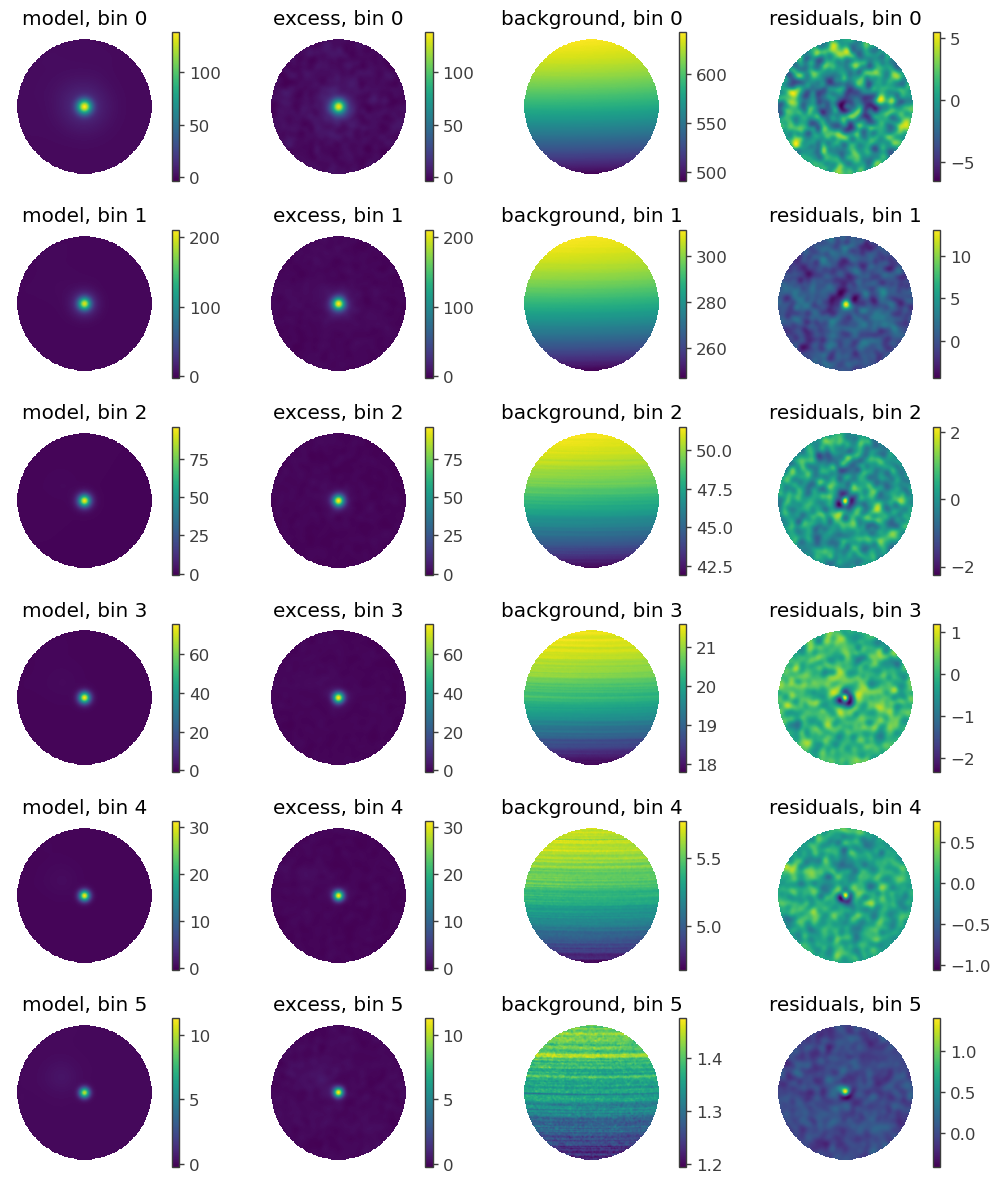

In [14]:
# Attempt the fitting; it will take approximately two minutes.
result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="root")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

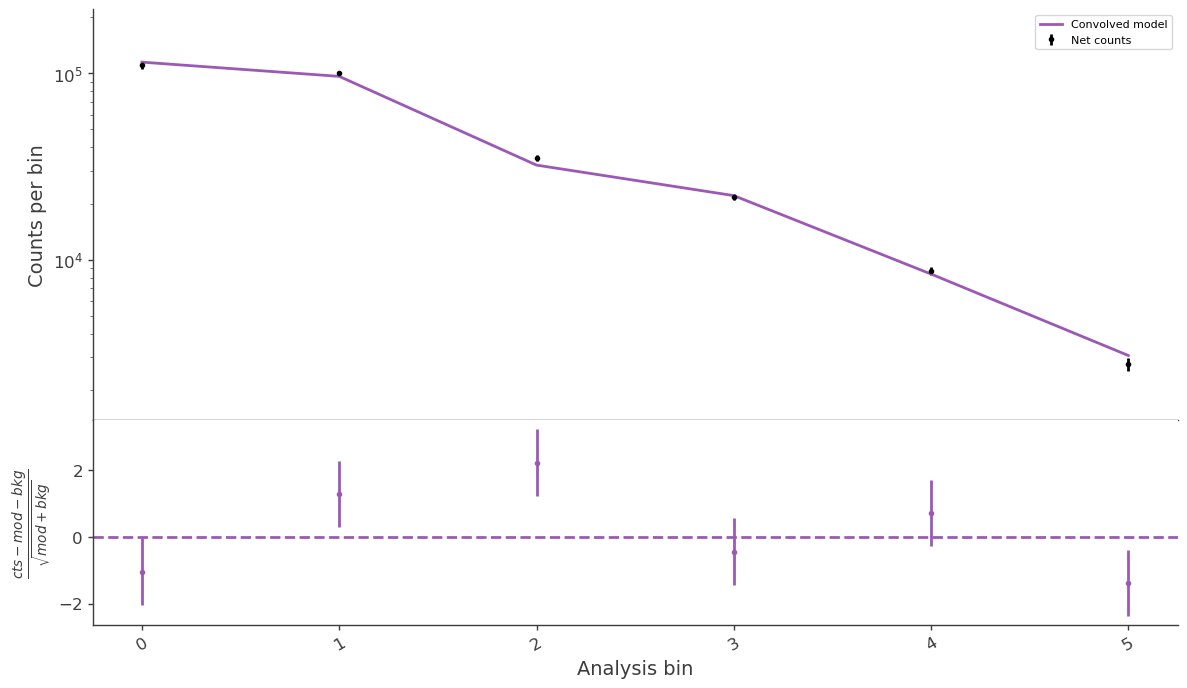

In [15]:
fig = WCDA.display_spectrum()

In [ ]:
# Don't try this!!!! as it requires a significant amount of time!!!"
gof_obj = GoodnessOfFit(result[0])
gof, data_frame, like_data_frame = gof_obj.by_mc(n_iterations=200)

In [14]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab", "ext1", "Diffuse"]  # A list put the sources that you want to compute TS
TS, TSresults = my.getTSall(TSlist, region_name, Modelname, result, WCDA)
TSresults

16:16:13 INFO      Considering 15 dec bins for extended source ext1                 ]8;id=801863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=163713;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.440                       ]8;id=338384;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=66829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=342762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=825744;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 22.829                       ]8;id=314391;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=486045;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=525757;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=768294;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=704686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=713581;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

16:17:42 INFO      Considering 15 dec bins for extended source ext1                 ]8;id=109490;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=252697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.440                       ]8;id=211572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=603080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=140447;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=84468;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 22.829                       ]8;id=469728;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=863628;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=271692;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=443114;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 22.829                       ]8;id=295305;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=559152;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=843770;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=498093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=621445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=310328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

16:18:32 INFO      Considering 15 dec bins for extended source ext1                 ]8;id=727307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=511816;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.440                       ]8;id=234989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=371071;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=81323;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=766463;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 22.829                       ]8;id=163319;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=285270;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

16:18:33 INFO      Considering 15 dec bins for extended source ext1                 ]8;id=855686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=362595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.440                       ]8;id=287628;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=286200;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=587129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=275443;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=206690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=781657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

16:19:24 INFO      Considering 15 dec bins for extended source ext1                 ]8;id=436302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=734883;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.440                       ]8;id=519235;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=345046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=947399;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=86693;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 22.829                       ]8;id=68165;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=530556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\


100%|██████████| 3/3 [03:12<00:00, 64.21s/it]


,crab,ext1,Diffuse,TS_all,-log(likelihood)
0,45657.910061,237.165085,6.92982,122415.387167,9721.189767


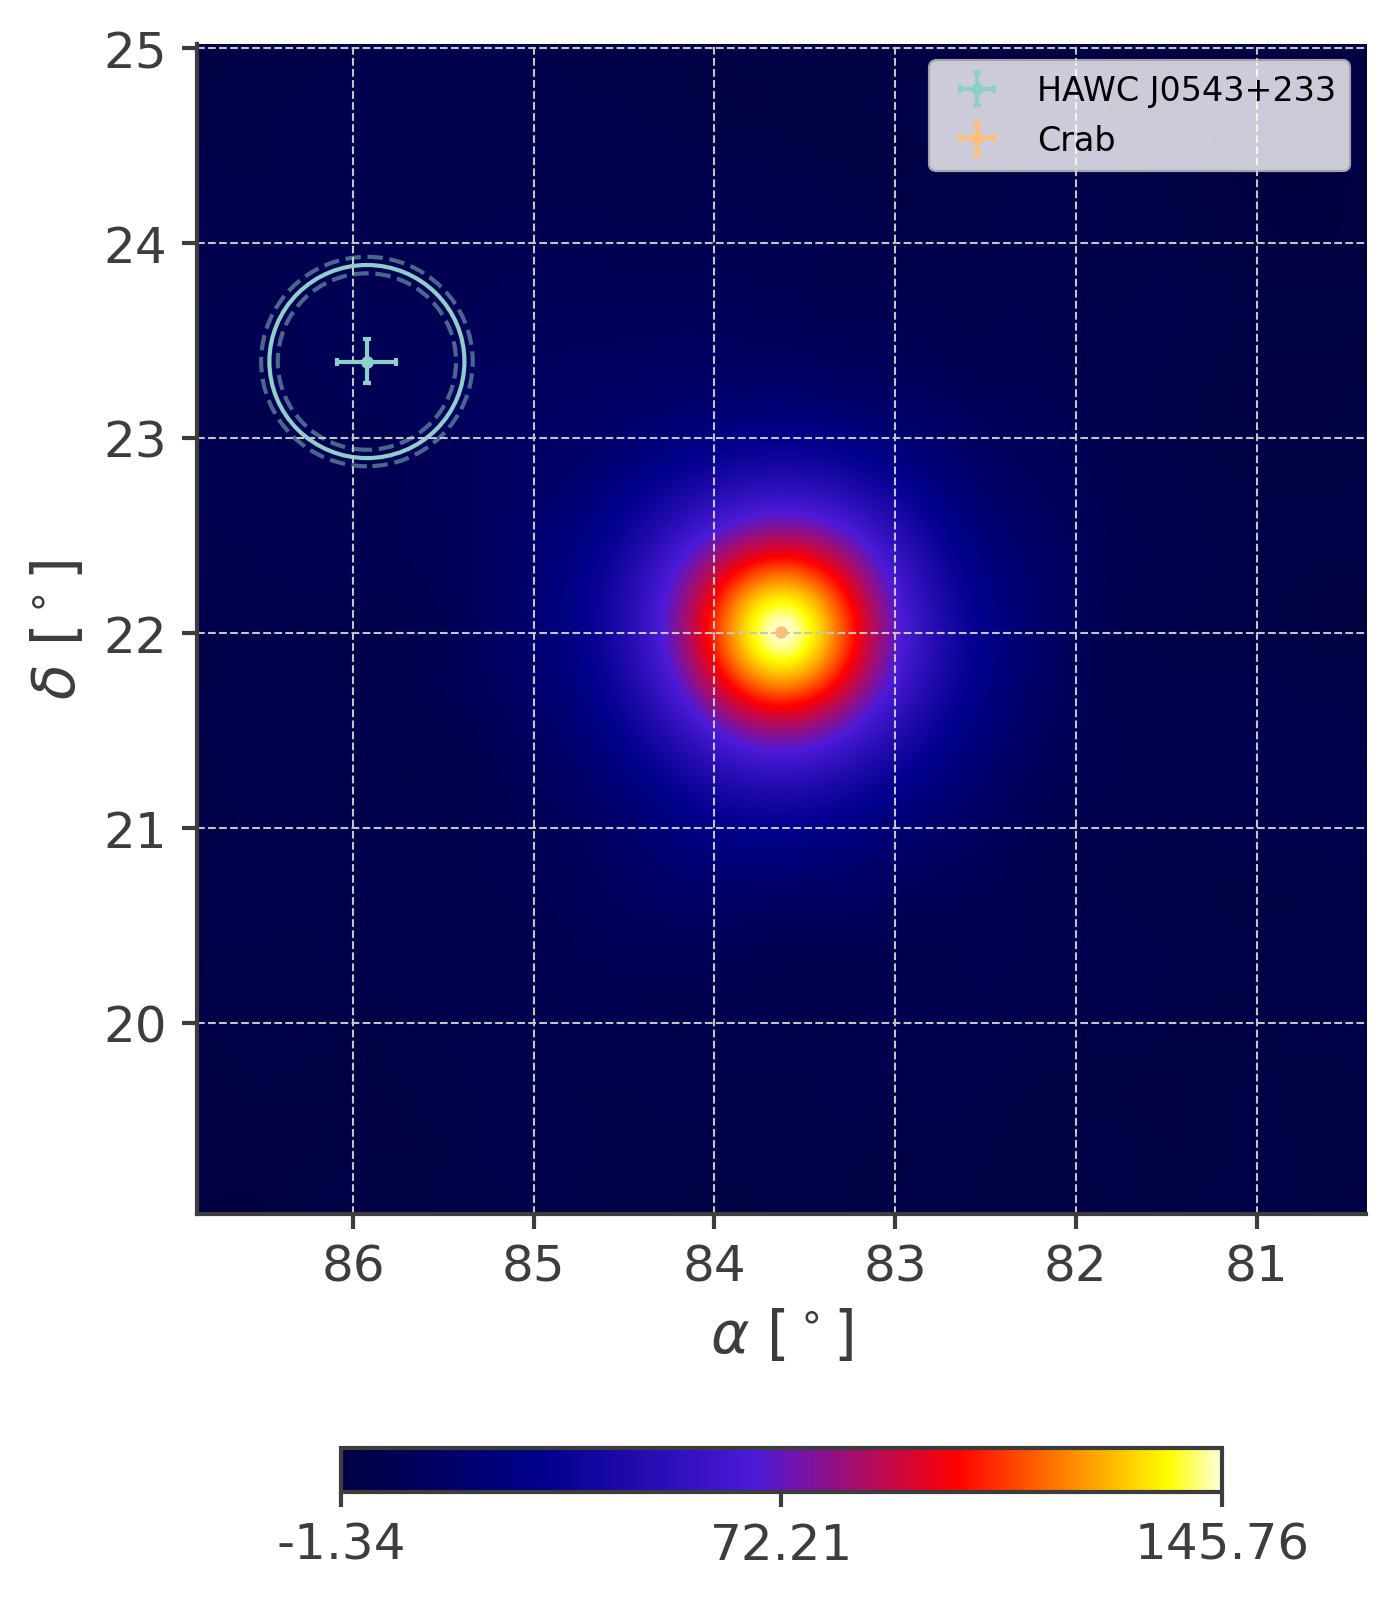

In [16]:
%matplotlib inline
sources = my.get_sources(lm,result)
sources.pop("Diffuse")
sources["HAWC J0543+233"]=sources.pop("ext1")
sources["Crab"]=sources.pop("crab")
# sources={}
map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=6, contours=[1000],save=True, cat={})
plt.legend()

In [17]:
Flux_WCDA, jls1 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab")
# Flux_WCDA2, jls2 = my.getdatapoint(WCDA, lm, maptree, response, roi, "ext1", ifpowerlawM=1)
# Flux_WCDA3 = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse")

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.369 +/- 0.028) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1651.291488
total,1651.291488


Values of statistical measures:

,statistical measures
AIC,3304.582996
BIC,3314.822320


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.592 +/- 0.017) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1673.293305
total,1673.293305


Values of statistical measures:

,statistical measures
AIC,3348.586629
BIC,3358.825952


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.481 +/- 0.021) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1641.369525
total,1641.369525


Values of statistical measures:

,statistical measures
AIC,3284.739070
BIC,3294.978393


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.449 +/- 0.022) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1671.041364
total,1671.041364


Values of statistical measures:

,statistical measures
AIC,3344.082748
BIC,3354.322072


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.455 +/- 0.035) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1587.445718
total,1587.445718


Values of statistical measures:

,statistical measures
AIC,3176.891456
BIC,3187.130780


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.68 -0.06 +0.07) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1446.032779
total,1446.032779


Values of statistical measures:

,statistical measures
AIC,2894.065578
BIC,2904.304901


100%|██████████| 6/6 [00:22<00:00,  3.78s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

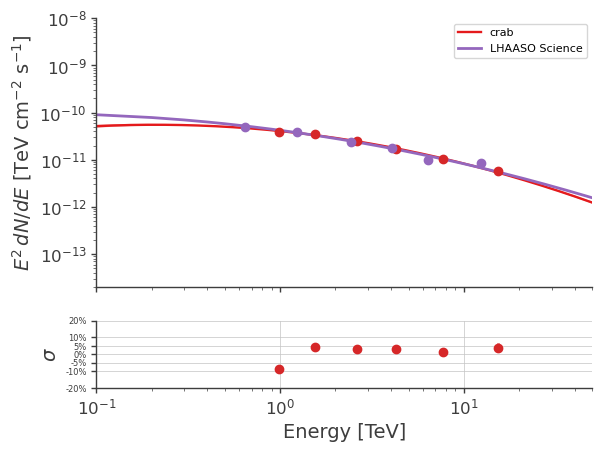

In [18]:
%matplotlib inline
x_Max=50.
x_Min=.1
y_Min=0.2e-13
y_Max=1e-8
fig,ax = plt.subplots(2, 1, sharex=True, height_ratios=(0.8,0.2))
plot_spectra(
    result[0].results,
    sources_to_use=["crab"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax[0]
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"","tab:red", subplot=ax[0])
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3,"Crab_data2","tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2,"","tab:blue")

e_J0248=np.linspace(x_Min,x_Max,500)
crab_data = np.array([[0.645589, 4.99911e-11, 5.2533e-12],
[1.23979, 3.89817e-11, 2.24529e-12],
[2.42276, 2.40127e-11, 1.76418e-12],
[4.06902, 1.73829e-11, 1.68635e-12],
[6.35322, 9.85614e-12, 1.47362e-12],
[12.3595, 8.32206e-12, 8.84423e-13]])
flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
ax[0].errorbar(crab_data[:,0], crab_data[:,1], crab_data[:,2],fmt="o", c = "tab:purple") #,label='Crab Science'
ax[0].plot(e_J0248,flux_J0248_sci,label='LHAASO Science', c = "tab:purple")

flux_J0245_sci_samee = Flux_WCDA[:,0]**2*8.2e-14*pow(Flux_WCDA[:,0]/10,-2.9-0.19*np.log10(Flux_WCDA[:,0]/10))
ax[1].errorbar(Flux_WCDA[:,0], 100*(1e9*Flux_WCDA[:,3]*Flux_WCDA[:,0]**2-flux_J0245_sci_samee)/flux_J0245_sci_samee, color="tab:red", yerr=[100*(1e9*Flux_WCDA[:,6]*Flux_WCDA[:,0]**2)/flux_J0245_sci_samee, 100*(1e9*Flux_WCDA[:,6]*Flux_WCDA[:,0]**2)/flux_J0245_sci_samee], fmt='go')
ax[1].set_ylim(-0.2,0.2)
ax[1].set_yticks([-20, -10, -5, 0, 5, 10, 20])
ax[1].yaxis.set_tick_params(labelsize=6)
ax[1].grid()
ax[1].set_ylabel(r"$\sigma$")
from matplotlib.ticker import FuncFormatter
# 设置刻度单位转换函数
def format_y_axis(value, _):
    # 将y轴值除以1000，设置为千为单位
    return f"{value}%"

# 应用刻度格式化函数到y轴
ax[1].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax[0].set_xlim(x_Min,x_Max)
ax[0].set_ylim(y_Min,y_Max)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax[1].set_xlabel("Energy [TeV]")
ax[0].legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

In [3]:
reload(my)

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 176.68it/s]   

Yourlib init successfully!!!


<module 'mylib' from '/data/home/cwy/Science/3MLWCDA/Standard/src/mylib/__init__.py'>

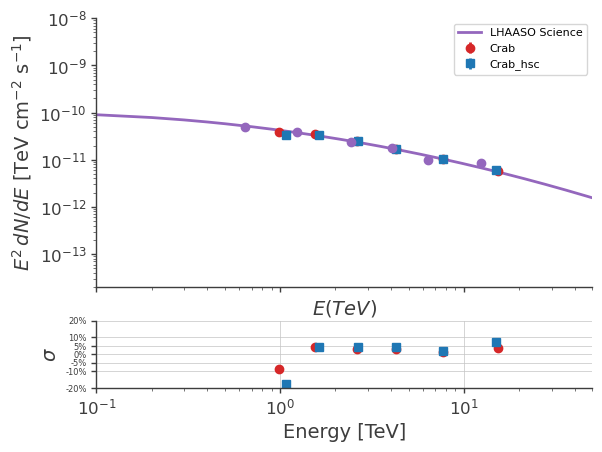

Load sub from Myspeedup: 100%|██████████| 37/37 [00:11<00:00, 176.68it/s]

In [4]:
# Energy  =     np.array([  1.073,     1.619,     2.656,     4.274,     7.654,    14.978])    
# Flux    =     np.array([ 33.470,    33.418,    24.359,    17.280,    10.567,     6.029])
# Ferr    =     np.array([  0.394,     0.225,     0.207,     0.159,     0.153,     0.146])

# Energy  =     np.array([  1.073,     1.619,     2.656,     4.275,     7.654,    14.981])    
# Flux    =     np.array([ 33.458,    33.409,    24.357,    17.279,    10.568,     6.033])
# Ferr    =     np.array([  0.385,     0.225,     0.207,     0.159,     0.153,     0.146])

Energy  =     np.array([   1.074,     1.620,     2.656,     4.275,     7.654,    14.977])    
Flux    =     np.array([  33.358,    33.405,    24.346,    17.279,    10.565,     6.035])
Ferr    =     np.array([   0.389,     0.225,     0.210,     0.159,     0.153,     0.146])



%matplotlib inline
x_Max=50.
x_Min=.1
y_Min=0.2e-13
y_Max=1e-8
fig,ax = plt.subplots(2, 1, sharex=True, height_ratios=(0.8,0.2))

# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"","tab:red", subplot=ax[0])
data2 = my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/Crab_0248_my/1pt+1gaus+DGE/Spectrum_.txt", label="Crab", color="tab:red", subplot=ax[0])
my.drawspechsc(Energy, Flux, Ferr, label="Crab_hsc", colorp="tab:blue", subplot=ax[0], Fc=1e-12)
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3,"Crab_data2","tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2,"","tab:blue")

e_J0248=np.linspace(x_Min,x_Max,500)
crab_data = np.array([[0.645589, 4.99911e-11, 5.2533e-12],
[1.23979, 3.89817e-11, 2.24529e-12],
[2.42276, 2.40127e-11, 1.76418e-12],
[4.06902, 1.73829e-11, 1.68635e-12],
[6.35322, 9.85614e-12, 1.47362e-12],
[12.3595, 8.32206e-12, 8.84423e-13]])
flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
ax[0].errorbar(crab_data[:,0], crab_data[:,1], crab_data[:,2],fmt="o", c = "tab:purple") #,label='Crab Science'
ax[0].plot(e_J0248,flux_J0248_sci,label='LHAASO Science', c = "tab:purple")

flux_J0245_sci_samee = data2[0]**2*8.2e-14*pow(data2[0]/10,-2.9-0.19*np.log10(data2[0]/10))
ax[1].errorbar(data2[0], 100*(data2[1]-flux_J0245_sci_samee)/flux_J0245_sci_samee, color="tab:red", yerr=[100*(data2[2])/flux_J0245_sci_samee, 100*(data2[2])/flux_J0245_sci_samee], fmt='go')

Fc=1e-12
flux_J0245_sci_samee = Energy**2*8.2e-14*pow(Energy/10,-2.9-0.19*np.log10(Energy/10))
ax[1].errorbar(Energy, 100*(Flux*Fc-flux_J0245_sci_samee)/flux_J0245_sci_samee, color="tab:blue", yerr=[100*(Ferr*Fc)/flux_J0245_sci_samee, 100*(Ferr*Fc)/flux_J0245_sci_samee], fmt='gs')

ax[1].set_ylim(-0.2,0.2)
ax[1].set_yticks([-20, -10, -5, 0, 5, 10, 20])
ax[1].yaxis.set_tick_params(labelsize=6)
ax[1].grid()
ax[1].set_ylabel(r"$\sigma$")
from matplotlib.ticker import FuncFormatter
# 设置刻度单位转换函数
def format_y_axis(value, _):
    # 将y轴值除以1000，设置为千为单位
    return f"{value}%"

# 应用刻度格式化函数到y轴
ax[1].yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax[0].set_xlim(x_Min,x_Max)
ax[0].set_ylim(y_Min,y_Max)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax[1].set_xlabel("Energy [TeV]")
ax[0].legend()
# plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
# plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')


In [ ]:
reload()

In [20]:
# If you want to get residual llh map, you need a new rootfile.
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, response,
ra1, dec1, "crab_WCDA",
[0],[0,0], #point source and ext source, if you have 3pt and 2 ext, and you only want sig about pt1, then use [1,0,0],[0, 0], or you only want 2nd ext: [0,0,0],[0,1]
data_radius,
binc="all",
detector="WCDA"
)
# ! The file you got need use Add_UserInfo.cc in ./tools/llh_skymap to add UserInfo

15:56:13 INFO      crab_WCDA_res                                                                    ]8;id=227125;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=101601;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#679\679]8;;\

         INFO      processing at nHit00                                                             ]8;id=384921;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=512797;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#728\728]8;;\

100%|██████████| 34461/34461 [00:01<00:00, 19944.95it/s]


15:56:16 INFO      processing at nHit01                                                             ]8;id=37137;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=696171;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#728\728]8;;\

100%|██████████| 34461/34461 [00:01<00:00, 20434.62it/s]


15:56:19 INFO      processing at nHit02                                                             ]8;id=64399;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=640870;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#728\728]8;;\

100%|██████████| 34461/34461 [00:01<00:00, 19636.36it/s]


15:56:22 INFO      processing at nHit03                                                             ]8;id=896382;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=550092;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#728\728]8;;\

100%|██████████| 34461/34461 [00:01<00:00, 22485.60it/s]


15:56:24 INFO      processing at nHit04                                                             ]8;id=278441;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=652291;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#728\728]8;;\

100%|██████████| 34461/34461 [00:01<00:00, 18981.87it/s]


15:56:27 INFO      processing at nHit05                                                             ]8;id=592089;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=886958;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#728\728]8;;\

100%|██████████| 34461/34461 [00:01<00:00, 19732.34it/s]


'crab_WCDA_res'

243718.manage.localdomain
243719.manage.localdomain
243720.manage.localdomain
243721.manage.localdomain
243722.manage.localdomain
243723.manage.localdomain
243724.manage.localdomain
243725.manage.localdomain
243726.manage.localdomain
243727.manage.localdomain
243728.manage.localdomain
243729.manage.localdomain
243730.manage.localdomain
243731.manage.localdomain
243732.manage.localdomain
243733.manage.localdomain
243734.manage.localdomain
243735.manage.localdomain
243736.manage.localdomain
243737.manage.localdomain
243738.manage.localdomain
243739.manage.localdomain
243740.manage.localdomain
243741.manage.localdomain
243742.manage.localdomain
243743.manage.localdomain
243744.manage.localdomain
243745.manage.localdomain
243746.manage.localdomain
243747.manage.localdomain
243748.manage.localdomain
243749.manage.localdomain
243750.manage.localdomain
243751.manage.localdomain
243752.manage.localdomain
243753.manage.localdomain


Error in <TList::Delete>: A list is accessing an object (0x1d762a0) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1df4bf0) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1e0f470) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1de81c0) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1de97f0) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1e07a80) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1e07d20) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1e0cfa0) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is accessing an object (0x1e0d240) already deleted (list name = UserInfo)
Error in <TList::Delete>: A list is a

setting the output map dtype to [dtype('float64')]


LHAASO:  1 83.62 22.01 1LHAASO J0534+2200u  0.0
LHAASO:  2 83.61 22.04 1LHAASO J0534+2200u   0.0
LHAASO:  3 85.71 23.2  1LHAASO J0542+2311u  0.98
LHAASO:  4 86.07 23.19  1LHAASO J0542+2311u   1.45
TeVCat:  1 80.43749999999999 21.214277777777777 VER J0521+211 0.0
TeVCat:  2 83.62874999999998 22.01236111111111 Crab 0.0145
TeVCat:  3 83.63291666666665 22.0145 Crab Pulsar 0.0
TeVCat:  4 85.77999999999999 23.4 HAWC J0543+233 0.5
PSR:  1 79.29166666666666 22.266666666666666 J0517+22
PSR:  2 82.21774999999998 22.00111111111111 J0528+2200
PSR:  3 83.63320833333333 22.01447222222222 J0534+2200
PSR:  4 85.79025 23.484722222222224 J0543+2329
PSR:  5 86.61983333333332 24.689166666666665 J0546+2441
SNR:  1 83.62916666666665 22.016666666666666 G184.6-05.8
SNR:  2 84.75 27.833333333333332 G180.0-01.7
3FHL:  1 77.52109 18.008722 3FHL J0510.0+1800
3FHL:  2 80.44172 21.213364 3FHL J0521.7+2112
3FHL:  3 83.634834 22.019203 3FHL J0534.5+2201
3FHL:  4 84.06884 17.566227 3FHL J0536.2+1733
3FHL:  5 84.41 27.

17:18:00 INFO      1200 1200                                                                        ]8;id=827959;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=425102;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#409\409]8;;\

17:18:01 INFO      ************************                                                         ]8;id=179427;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=770598;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#600\600]8;;\

         INFO      [1.64156476e+03 1.09061430e-01 1.03964665e+00]                                   ]8;id=898535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=482000;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#601\601]8;;\

         INFO      ************************                                                         ]8;id=50163;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=961370;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#602\602]8;;\

         INFO      max Significance= 3.7                                                            ]8;id=142265;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=686468;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#603\603]8;;\

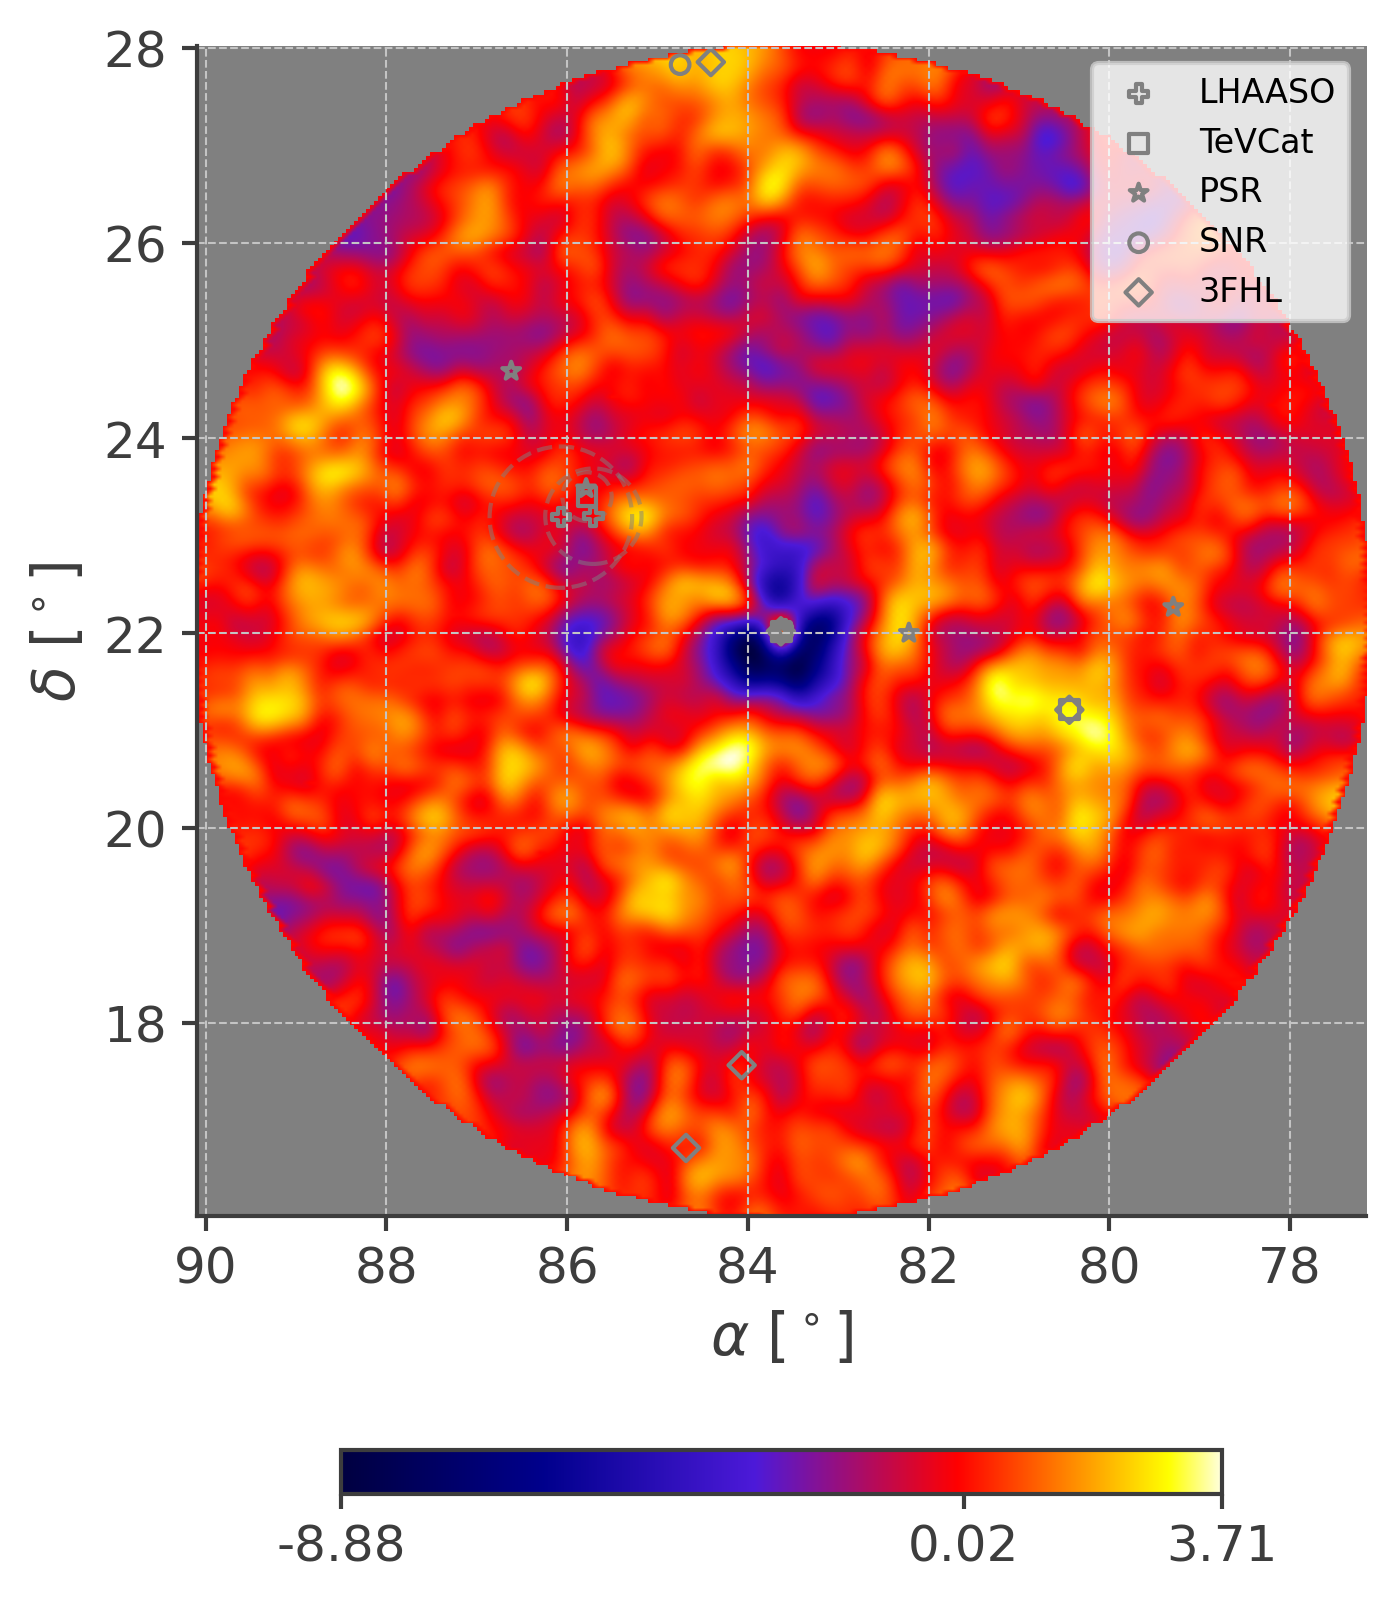

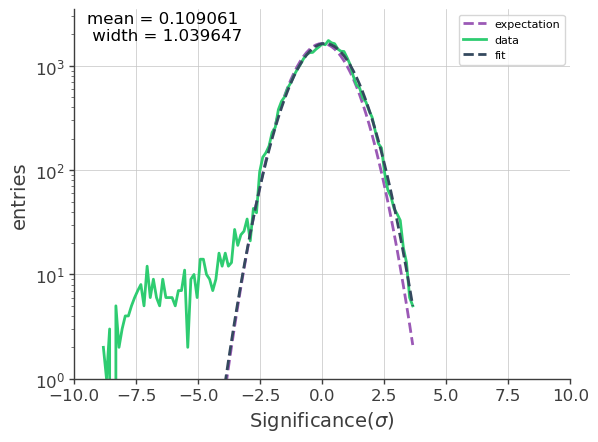

In [21]:
%matplotlib inline
resmap = my.getllhskymap("crab_WCDA_res", region_name, Modelname, ra1, dec1, data_radius, ifsave=True, ifdraw=1, tofits=1, detector="WCDA")
my.getsig1D(resmap, region_name, Modelname, region_name)

In [19]:
f1 = Flux_WCDA[0][3]*1e9*Flux_WCDA[0][0]**2
e1 = Flux_WCDA[0][0]
f2=Flux_WCDA[0][0]**2*8.2e-14*pow(Flux_WCDA[0][0]/10,-2.9-0.19*np.log10(Flux_WCDA[0][0]/10))
print(e1, f1, f2, (f2-f1)/f2)

0.9880258494475878 3.944349590240748e-11 4.2318389576591225e-11 0.06793485534180203


In [18]:
#About 5 min
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]#The first six bins are normal, and the following ones are merged bins, representing the total (merged), without the first bin, and without the first two bins, respectively.
maps = my.getmap(WCDA,roi,"Crab",
                 modelindex=[1,2], # modelindex: pt and ext number
               # pta=[0], exta=[0],
                   stack=[1.010229, 1.020917, 1.040597, 1.064803, 1.090451, 1.130015], #Combine bins with all bin based on signal-to-noise ratio.
                  #  stack=[0, 0, 1.002131,1.005977,1.002093,1.004078], #Combine bins with nhit >= 200 based on signal-to-noise ratio.
                  #  stack=[0, 1.002131,1.005977,1.002093,1.004078],
                   smoothsigma=smoothsigma
                   #, binc=["1","2","3","4","5"]
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)




100%|██████████| 34461/34461 [00:00<00:00, 129641.04it/s]


Mask all







100%|██████████| 34461/34461 [00:00<00:00, 84057.17it/s]


Mask all







100%|██████████| 34461/34461 [00:00<00:00, 81886.32it/s]


Mask all







100%|██████████| 34461/34461 [00:00<00:00, 83407.10it/s]


Mask all







100%|██████████| 34461/34461 [00:00<00:00, 82923.80it/s]


Mask all







100%|██████████| 34461/34461 [00:00<00:00, 83728.20it/s]


Mask all








100%|██████████| 11/11 [00:19<00:00,  1.77s/it]


Set stack_sigma automatelly!!!



100%|██████████| 34461/34461 [00:00<00:00, 500048.12it/s]

Smooth Sig
Smooth bkg
Smooth Modelbkg
Mask all








100%|██████████| 5/5 [00:03<00:00,  1.61it/s]



get disc pixnum: 100%|██████████| 20/20 [00:00<00:00, 21868.11it/s]

get ring pixnum: 100%|██████████| 19/19 [00:00<00:00, 110071.51it/s]


compute disk: 100%|██████████| 20/20 [00:00<00:00, 161.04it/s]

compute ring: 100%|██████████| 19/19 [00:00<00:00, 118765.69it/s]


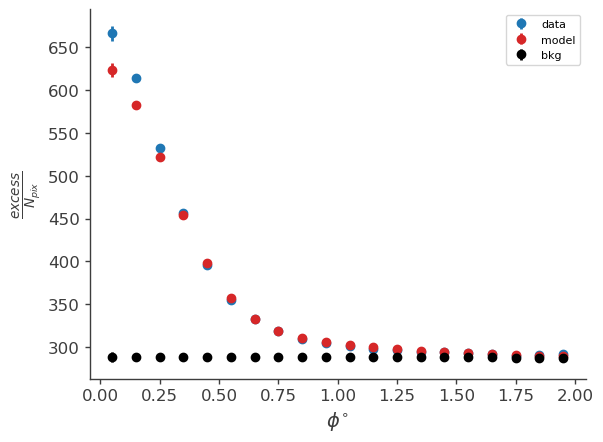

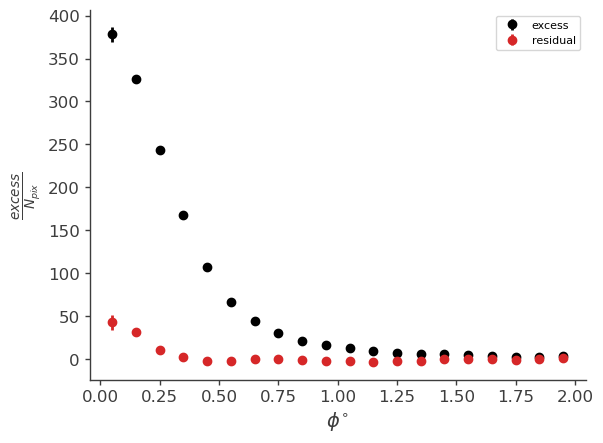

In [19]:
%matplotlib inline
psfdata = my.Draw_lateral_distribution(region_name, Modelname, maps[0], 83.622, 22.002, 20, 0.1, True)

************************
[1.39691505e+03 1.52363019e-01 1.18764544e+00]
************************
max Significance= 7.8
LHAASO:  1 83.62 22.01 1LHAASO J0534+2200u    Crab                  (0.01) 0.0
LHAASO:  2 86.07 23.19  1LHAASO J0542+2311u     1.45
TeVCat:  1 80.43749999999999 21.214277777777777 VER J0521+211 0.0
TeVCat:  2 83.62874999999998 22.01236111111111 Crab 0.0145
TeVCat:  3 83.63291666666665 22.0145 Crab Pulsar 0.0
TeVCat:  4 85.77999999999999 23.4 HAWC J0543+233 0.5
PSR:  1 79.29166666666666 22.266666666666666 J0517+22
PSR:  2 82.21774999999998 22.00111111111111 J0528+2200
PSR:  3 83.63320833333333 22.01447222222222 J0534+2200
PSR:  4 85.79025 23.484722222222224 J0543+2329
PSR:  5 86.61983333333332 24.689166666666665 J0546+2441
SNR:  1 83.62916666666665 22.016666666666666 G184.6-05.8
SNR:  2 84.75 27.833333333333332 G180.0-01.7
3FHL:  1 77.52109 18.008722 3FHL J0510.0+1800
3FHL:  2 80.44172 21.213364 3FHL J0521.7+2112
3FHL:  3 83.634834 22.019203 3FHL J0534.5+2201
3FHL:  4 8

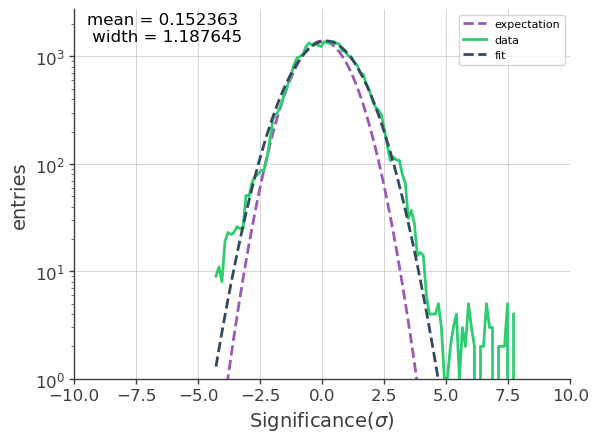

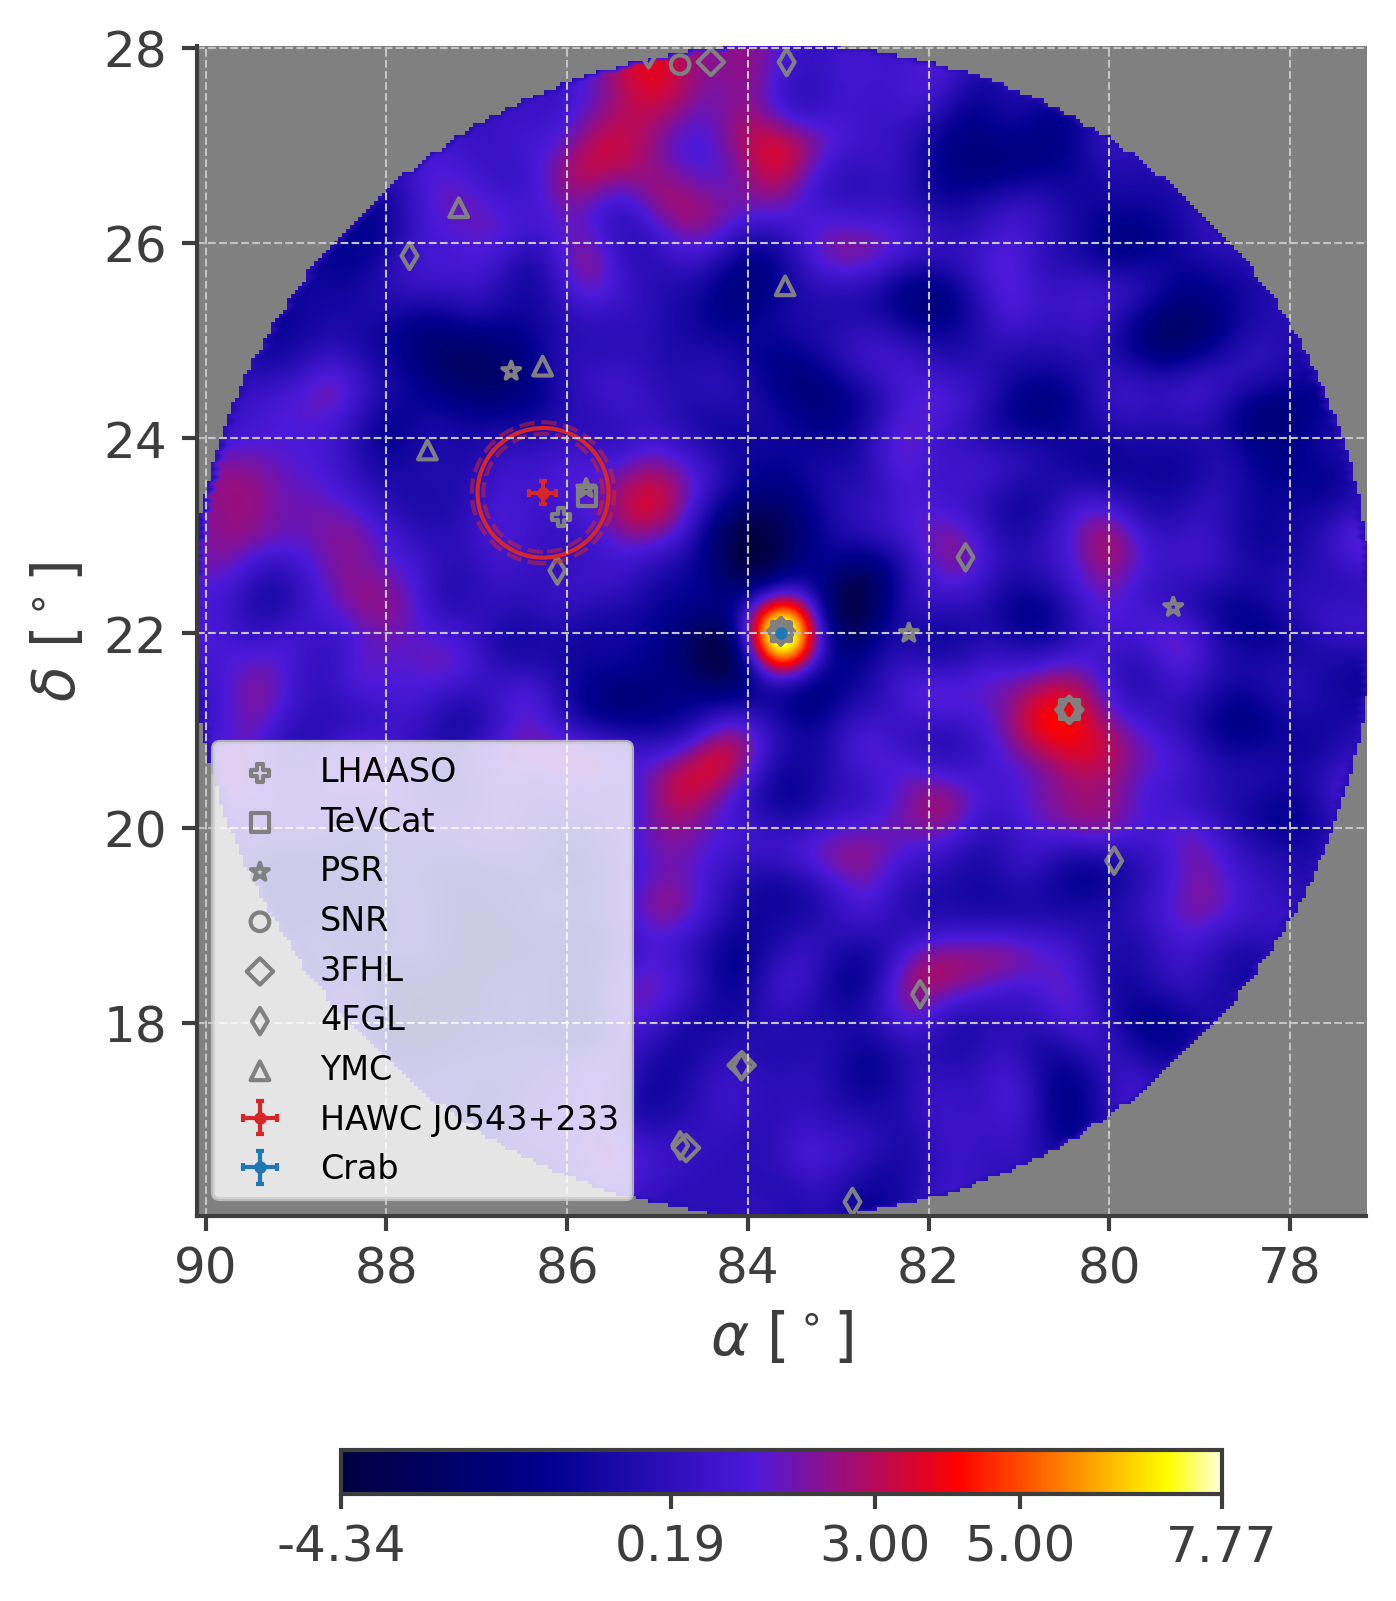

In [20]:
%matplotlib inline
res=True # Do you want resmap? or org map.
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="Crab")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=2*data_radius, contours=[1000],save=True,savename=saven)
#There is another source around crab, so you can try another model: 1pt+1gaus maybe?

In [14]:
# If you want to get residual llh map, you need a new rootfile.
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, 
ra1, dec1, "crab_res",
[0],[0], #point source and ext source, if you have 3pt and 2 ext, and you only want sig about pt1, then use [1,0,0],[0, 0], or you only want 2nd ext: [0,0,0],[0,1]
binc="all"
)
# ! The file you got need use Add_UserInfo.cc in ./tools/llh_skymap to add UserInfo

processing at nHit0 0


100%|██████████| 95570/95570 [00:02<00:00, 35216.27it/s]


processing at nHit0 1


100%|██████████| 95570/95570 [00:02<00:00, 35621.61it/s]


processing at nHit0 2


100%|██████████| 95570/95570 [00:02<00:00, 33768.19it/s]


processing at nHit0 3


100%|██████████| 95570/95570 [00:02<00:00, 42397.09it/s]


processing at nHit0 4


100%|██████████| 95570/95570 [00:02<00:00, 34218.55it/s]


processing at nHit0 5


100%|██████████| 95570/95570 [00:02<00:00, 34889.56it/s]
